# Explore the NYC Open Data for Dog ownership and related data

In [1]:
import pandas as pd
import numpy as np

## Dog Friendly Areas

In [2]:
# Load the Dog Runs json file
dog_runs_df = pd.read_json('DPR_DogRuns_001 (1).json')

# Load park inspection report for location Data
park_inpection_df = pd.read_csv('Parks_Inspection_Program___All_Sites__MAPPED__20240217.csv')

In [3]:
display(dog_runs_df.head(3), park_inpection_df.head(3))

,Prop_ID,Name,Address,DogRuns_Type,Accessible,Notes
0,X002,Bronx Park Off-Leash Area,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash,N,None
1,X008,Claremont Park Off-Leash Area,None,Off-Leash,N,None
2,X010,Crotona Park Off-Leash Area,Except for playgrounds and other areas where d...,Off-Leash,N,None


,PropNum,Prop ID,Boro,AMPSDistrict,Prop Name,Site Name,Prop Location,Site Location,Acres,Category,...,ZipCode,COMMUNITYBOARD,Jurisdiction,NYSAssembly,NYSSenate,USCongress,Precinct,PublicRestroom,Multipolygon,Sourcefc
0,B210W,B210W,B,10,John J Carty Park,John J Carty Park,Ft. Hamilton Pkwy. bet. 94 St. and 101 St.,Ft. Hamilton Pkwy. bet. 94 St. and 101 St.,8.565,Large Park,...,11209,310,DPR,46,NaN,11,68,Yes,MULTIPOLYGON (((-74.0300932735937 40.612841501...,Property
1,B210V,B210V,B,10,Park,Park,Dahlgreen Pl. bet. Exit 17 and Ft. Hill Pl.,Dahlgreen Pl. bet. Exit 17 and Ft. Hill Pl.,0.586,Other,...,11228,310,DPR,46,26,11,68,No,MULTIPOLYGON (((-74.02665909407455 40.61473026...,Property
2,B210U,B210U,B,10,Park,Park,92 St. bet. Gowanus Exwy. and Ft. Hamilton Pkwy.,92 St. bet. Gowanus Exwy. and Ft. Hamilton Pkwy.,0.002,Other,...,11209,310,DPR,46,26,11,68,No,MULTIPOLYGON (((-74.02691153290087 40.61648448...,Property


#### Clean park_inpection_df first

In [4]:
# What are the columns for the park_inspection_df
park_inpection_df.columns

Index(['PropNum', 'Prop ID', 'Boro', 'AMPSDistrict', 'Prop Name', 'Site Name',
       'Prop Location', 'Site Location', 'Acres', 'Category', 'Sub-Category',
       'Rated', 'Reason Not Rated', 'Council District', 'ZipCode',
       'COMMUNITYBOARD', 'Jurisdiction', 'NYSAssembly', 'NYSSenate',
       'USCongress', 'Precinct', 'PublicRestroom', 'Multipolygon', 'Sourcefc'],
      dtype='object')

In [5]:
# What Boro's? B = Brooklyn; M = Manhattan; Q = Queens; R = Richmond (Staten Island); X = Bronx
park_inpection_df['Boro'].value_counts()

Boro
Q    1862
B    1504
M    1169
X    1154
R     644
Name: count, dtype: int64

In [6]:
# Can I find some of the dog friendly parks in the inspection dataset?
print(park_inpection_df['Prop ID'][park_inpection_df['Prop ID'] == 'B210W'])
print(park_inpection_df['Prop ID'][park_inpection_df['Prop ID'] == 'B210U'])
print(park_inpection_df['Prop ID'][park_inpection_df['Prop ID'] == 'B210S'])

0    B210W
Name: Prop ID, dtype: object
2    B210U
Name: Prop ID, dtype: object
4    B210S
Name: Prop ID, dtype: object


In [7]:
# Are all the dog friendly parks listed in the inspection dataset? Yes
print(len(dog_runs_df['Prop_ID']))
park_match = dog_runs_df['Prop_ID'].isin(park_inpection_df['Prop ID'])
print(len(park_match))


151
151


In [8]:
# Drop unnecessary columns from the park_inpection_df
park_inspect_clipped_df = park_inpection_df.drop(['PropNum', 'AMPSDistrict', 'Site Name',
       'Site Location', 'Council District', 'COMMUNITYBOARD', 'Rated', 'Reason Not Rated', 
       'Jurisdiction', 'NYSSenate', 'Precinct', 'PublicRestroom', 'Sourcefc'], axis=1)

display(park_inspect_clipped_df.head())

,Prop ID,Boro,Prop Name,Prop Location,Acres,Category,Sub-Category,ZipCode,NYSAssembly,USCongress,Multipolygon
0,B210W,B,John J Carty Park,Ft. Hamilton Pkwy. bet. 94 St. and 101 St.,8.565,Large Park,Large Park,11209,46,11,MULTIPOLYGON (((-74.0300932735937 40.612841501...
1,B210V,B,Park,Dahlgreen Pl. bet. Exit 17 and Ft. Hill Pl.,0.586,Other,EXWY,11228,46,11,MULTIPOLYGON (((-74.02665909407455 40.61473026...
2,B210U,B,Park,92 St. bet. Gowanus Exwy. and Ft. Hamilton Pkwy.,0.002,Other,EXWY,11209,46,11,MULTIPOLYGON (((-74.02691153290087 40.61648448...
3,B210T,B,Park,N/B Gowanus Exwy. bet. 85 St. and 86 St.,0.004,Other,EXWY,11209,46,11,MULTIPOLYGON (((-74.02263251784636 40.61963394...
4,B210S,B,Park,S/B Gowanus Exwy. bet. 85 St. and 86 St.,0.004,Other,EXWY,11209,46,11,MULTIPOLYGON (((-74.02328071427831 40.62040292...


In [9]:
# Take a look at some of the values in select columns
display(park_inspect_clipped_df['Prop Name'].value_counts())
display(park_inspect_clipped_df['Category'].value_counts())
display(park_inspect_clipped_df['Sub-Category'].value_counts())

Prop Name
GREENSTREET                1286
Greenstreet                1108
Park                        193
Central Park                 65
Riverside Park               49
                           ... 
Dorrance Brooks Square        1
Duane Park                    1
Cooper Triangle               1
Corlears Hook Park            1
Buhre ave & Mulford Ave       1
Name: count, Length: 2383, dtype: int64

Category
Greenstreet     2738
Small Park      2050
Large Park       829
Other            161
Small Center      53
Property          18
Large Center      17
Playground         9
Schoolyard         1
Name: count, dtype: int64

Sub-Category
Type 1                           1316
Type 2                            565
Neighborhood Plgd                 501
Sitting Area/Triangle/Mall        501
Large Park Zone                   336
Plgd Within Park                  311
JOP                               265
Greenthumb                        244
Large Park                        207
Flagship Park Zone                204
Neighborhood Park                 118
DOE Plgd                           63
Beach Zone                         52
Undeveloped                        52
Recreation Center                  34
REDEC                              34
EXWY                               31
Null                               30
STRIP                              29
Flagship Park                      20
Type 1 Greenstreet                 18
Nature Center                      16
Golf Course                        14
Field House                        13
Building                           13
Parking Lot                        10

In [10]:
park_inspect_clipped_df.rename(columns={'Prop ID': 'Prop_ID'}, inplace=True)
park_inspect_clipped_df.columns

Index(['Prop_ID', 'Boro', 'Prop Name', 'Prop Location', 'Acres', 'Category',
       'Sub-Category', 'ZipCode', 'NYSAssembly', 'USCongress', 'Multipolygon'],
      dtype='object')

#### dog_runs_df -------------------------------------------------------------

In [11]:
# What is in the Address line?
dog_runs_df['Address'][0]

'Unionport & Sagamore on Bronx Park East to 233rd Street'

In [12]:
dog_runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Prop_ID       151 non-null    object
 1   Name          151 non-null    object
 2   Address       144 non-null    object
 3   DogRuns_Type  149 non-null    object
 4   Accessible    151 non-null    object
 5   Notes         76 non-null     object
dtypes: object(6)
memory usage: 7.2+ KB


In [13]:
dog_runs_df.describe()

,Prop_ID,Name,Address,DogRuns_Type,Accessible,Notes
count,151,151,144,149,151,76
unique,138,149,133,2,2,18
top,M,Baisley Pond Park Off-Leash Area,,Run,N,
freq,3,2,11,81,143,58


In [14]:
dog_runs_df.columns

Index(['Prop_ID', 'Name', 'Address', 'DogRuns_Type', 'Accessible', 'Notes'], dtype='object')

In [15]:
# What are the Notes?
dog_runs_df['Notes'].value_counts()

Notes
                                                                                                                                                                                                                                                                                                                                                          58
<a href="https://vancortlandt.org/visit/things-to-see-and-do/">More info.</a>                                                                                                                                                                                                                                                                              2
The dog run at Pelham Bay Park is close to Watt Avenue and Middletown Road.  Both streets merge at the entrance to the parking lot on Middletown Road. The dog run is about 100 yards east of that point.<br><a href="http://nycgovparks.org/parks/X039/map/pelhambay_dogonleasharea.pdf">Please downloa

In [16]:
# drop unnecessary columns
dog_runs_clipped_df = dog_runs_df.drop(columns=['Accessible', 'Notes'])

In [17]:
dog_runs_clipped_df.head()

,Prop_ID,Name,Address,DogRuns_Type
0,X002,Bronx Park Off-Leash Area,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash
1,X008,Claremont Park Off-Leash Area,None,Off-Leash
2,X010,Crotona Park Off-Leash Area,Except for playgrounds and other areas where d...,Off-Leash
3,X019,Ewen Park Dog Run,"Riverdale to Johnson avenues, south of West 23...",Run
4,X110A,Frank S. Hackett Park Dog Run,Riverdale Avenue at Henry Hudson Parkway,Run


In [18]:
# Export as CSV
# dog_runs_df.to_csv('dog_friendly_areas.csv')

#### Merge park inspection info into to the dog_runs_df dataframe

In [19]:
display(dog_runs_clipped_df.columns, park_inspect_clipped_df.columns)

Index(['Prop_ID', 'Name', 'Address', 'DogRuns_Type'], dtype='object')

Index(['Prop_ID', 'Boro', 'Prop Name', 'Prop Location', 'Acres', 'Category',
       'Sub-Category', 'ZipCode', 'NYSAssembly', 'USCongress', 'Multipolygon'],
      dtype='object')

In [20]:
dog_friendly_merged_df = dog_runs_clipped_df.merge(right=park_inspect_clipped_df, how='left', on='Prop_ID')
display(dog_friendly_merged_df.sample(10))

,Prop_ID,Name,Address,DogRuns_Type,Boro,Prop Name,Prop Location,Acres,Category,Sub-Category,ZipCode,NYSAssembly,USCongress,Multipolygon
44,B087,Sunset Park Off-Leash Area,"Sunset Park Oval lawn area only, center of par...",Off-Leash,B,Sunset Park,"41 St., 44 St., bet. 5 Ave. and 7 Ave.",24.497999,Large Park,Large Park,11232,51,10,MULTIPOLYGON (((-74.0009059513263 40.647499056...
29,B035,John Paul Jones Park Off-Leash Area,4th Avenue and 101st Street,Off-Leash,B,John Paul Jones Park,"101 St., Shore Pkwy. bet. 4 Ave. and Ft. Hamil...",5.317000,Small Park,Neighborhood Park,11209,46,11,MULTIPOLYGON (((-74.03430375819211 40.61181455...
81,Q102,Juniper Valley Park Off-Leash Area,,Off-Leash,Q,Juniper Valley Park,"Juniper Blvd. bet. Lutheran Ave., 71 St. and D...",55.639000,Large Park,Large Park,11379,28,6,MULTIPOLYGON (((-73.88081129246667 40.71920859...
41,B223DA,Adam Yauch Park Dog Run,Columbia Place & State Street,Run,B,Adam Yauch Park,"Atlantic Ave., Columbia Pl., State St.",1.363000,Small Park,Neighborhood Plgd,11201,52,10,MULTIPOLYGON (((-73.99836965458 40.69165014290...
85,Q009,MacNeil Park Off-Leash Area: 6:00 a.m. - 9:00 ...,Mainly zone #1,Off-Leash,Q,Hermon A. MacNeil Park,Poppenhusen Ave. bet. 115 St. and College Pl.,28.870001,Large Park,Large Park,11356,27,14,MULTIPOLYGON (((-73.8485241645034 40.792977822...
49,M022,De Witt Clinton Park Dog Run (2 runs),"West 52nd Street & West 54th Street, between 1...",Run,M,De Witt Clinton Park,"W. 52 St. To W. 54 St., 11 Ave. To 12 Ave.",5.829000,Small Park,Neighborhood Plgd,10019,67,12,MULTIPOLYGON (((-73.99383726769912 40.76727280...
70,M098,Washington Square Park Dog Run,"5th Avenue, Waverly Place, West 4th Street, be...",Run,M,Washington Square Park,"5 Ave, Waverly Pl., W. 4 St. and Macdougal St.",9.749000,Large Park,Large Park,10011,66,10,MULTIPOLYGON (((-73.99660685351029 40.72966821...
102,R027,Cozzens Woods Park Off-Leash Area,Page Avenue between Hylan Boulevard & Amboy Road,Off-Leash,R,Long Pond Park,"Page Ave., Hylan Blvd., and Amboy Rd.",91.085999,Large Park,Large Park,10309,62,11,MULTIPOLYGON (((-74.22665486323866 40.51353637...
106,R022,Silver Lake Park Dog Run,"Victory Boulevard below the pavilion, across f...",Run,R,Silver Lake Park,"Victory Blvd., Clove Rd., Forest Ave.",205.977005,Large Park,Large Park,10301,63,11,MULTIPOLYGON (((-74.09734236135799 40.62183259...
23,B372,Friends Field Park Off-Leash Area,"East 4th Street, Avenue L, and McDonald Avenue",Off-Leash,B,Friends Field,"Ave. L, E. 4 St., Mcdonald Ave., Ave. M",6.700000,Large Park,Large Park,11230,48,9,MULTIPOLYGON (((-73.97208388252155 40.61969433...


In [22]:
# Add a column for the expanded name for the Borrough
# Data Dictionary key for borroughs: B = Brooklyn; M = Manhattan; Q = Queens; R = Richmond (Staten Island); X = Bronx
borough_abr = list(dog_friendly_merged_df['Boro'])
boro_list = []

for i in borough_abr:
    if i == 'B':
        boro_list.append('Brooklyn')
    elif i == 'M':
        boro_list.append('Manhattan')
    elif i == 'Q':
        boro_list.append('Queens')
    elif i == 'R':
        boro_list.append('Staten Island')
    elif i == 'X':
        boro_list.append('Bronx')
    else:
        boro_list.append('Unknown')

display(boro_list)

['Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Bronx',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Brooklyn',
 'Manhattan',
 'Manhattan',
 'Unknown',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Unknown',
 'Unknown',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Manhattan',
 'Queens',
 'Queens',
 'Queens',
 'Queens',
 'Queens',
 'Queens',
 'Queens',
 'Queens',
 'Queens',


In [23]:
# Add borrough column
dog_friendly_merged_df['Borough'] = boro_list

dog_friendly_merged_df.head(2)

,Prop_ID,Name,Address,DogRuns_Type,Boro,Prop Name,Prop Location,Acres,Category,Sub-Category,ZipCode,NYSAssembly,USCongress,Multipolygon,Borough
0,X002,Bronx Park Off-Leash Area,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash,X,Bronx Park,"Southern Blvd,Webster,Burke Aves,Bronx Pk E,18...",718.372986,Large Park,Large Park,"10458, 10460, 10462, 10467","78, 80, 87",15,MULTIPOLYGON (((-73.87742156873537 40.85506243...,Bronx
1,X008,Claremont Park Off-Leash Area,None,Off-Leash,X,Claremont Park,"Clay Ave., Anthony Ave. bet. Mount Eden Pkwy. ...",38.535999,Large Park,Large Park,10457,"77, 86",15,MULTIPOLYGON (((-73.90826820373813 40.83722932...,Bronx


In [24]:
# Look at the "Unknown" Borough locations
dog_friendly_merged_df[dog_friendly_merged_df['Borough'] == 'Unknown']

,Prop_ID,Name,Address,DogRuns_Type,Boro,Prop Name,Prop Location,Acres,Category,Sub-Category,ZipCode,NYSAssembly,USCongress,Multipolygon,Borough
47,M,Chelsea Waterside Park Dog Run,11th Ave and 22nd Street,Run,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
54,M,Hudson River Park Dog Run (Greenwich Village),Leroy Street at the northeast corner of Pier 40,Run,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
55,M,Hudson River Park Dog Run (North Chelsea),Pier 84 at West 44th Street,Run,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [35]:
print(dog_friendly_merged_df[['Boro', 'ZipCode', 'Borough']].loc[[47, 54, 55]])

   Boro ZipCode  Borough
47    M     NaN  Unknown
54  NaN     NaN  Unknown
55  NaN     NaN  Unknown


In [39]:
# Populate table Null/Unknown rows with Zip Code/Borough info from online sources
# 11th and 22nd -> zipcode 10010, boro = 'M' - Manhattan
# Hudson River Park Dog Run (Greenwich Village) -> zipcode 10014, boro = 'M' - Manhattan
# Hudson River Park Dog Run (North Chelsea) -> zipcode 10011, boro = 'M' - Manhattan

cols = ['Boro', 'ZipCode', 'Borough']
indx = [47, 54, 55]
zips = ['10010', '10014', '10011']

for i in cols:
    for j in range(3):
        if i == 'Boro':
            dog_friendly_merged_df.at[indx[j], i] = 'M'
        elif i == 'ZipCode':
            dog_friendly_merged_df.at[indx[j], i] = zips[j]
        else:
            dog_friendly_merged_df.at[indx[j], i] = 'Manhattan'


print(dog_friendly_merged_df[['Boro', 'ZipCode', 'Borough']].loc[[47, 54, 55]])


   Boro ZipCode    Borough
47    M   10010  Manhattan
54    M   10014  Manhattan
55    M   10011  Manhattan


0    10458, 10460, 10462, 10467
1                         10457
2           10456, 10457, 10460
3                         10463
4                         10471
Name: ZipCode, dtype: object

In [57]:
# How many rows have multiple zipcodes?
indx = []

for i, zip in dog_friendly_merged_df[['ZipCode', 'Boro']].iterrows():
    # print(i, zip[0])
    if len(str(zip[0])) > 5:
        indx.append(i)

print(len(indx))

print(indx)

48
[0, 2, 9, 10, 12, 16, 18, 20, 21, 22, 31, 32, 35, 36, 43, 46, 52, 53, 56, 63, 65, 71, 77, 78, 79, 80, 84, 90, 91, 100, 107, 109, 110, 113, 114, 120, 121, 122, 124, 126, 127, 129, 130, 136, 137, 141, 145, 146]


C:\Users\CherKare\AppData\Local\Temp\ipykernel_1428\4229387479.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if len(str(zip[0])) > 5:


In [58]:
# That's alot of multi-zipcode areas
# bring in new data, dog run listings
dog_runs2_df = pd.read_csv('DogRuns_20190417_20240215.csv')

dog_runs2_df.head()

,OBJECTID,SYSTEM,the_geom,GISPROPNUM,DEPARTMENT,PARENTID,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,DOG_AREA_T,NAME,SEATING,SURFACE,FEATURESTA
0,292,M291-DOGAREA0043,MULTIPOLYGON (((-74.0016459156729 40.709326804...,M291,M-01,M291,101,1,1,10038,M,Dog Run,Fishbridge Garden Dog Run,NaN,NaN,Active
1,318,Q010A-DOGAREA0003,MULTIPOLYGON (((-73.79284763590378 40.78794400...,Q010A,Q-11,Q010A-ZN01,407,19,109,11360,Q,Dog Run,Little Bay Park Dog Run,NaN,NaN,Active
2,375,X092-DOGAREA0018,MULTIPOLYGON (((-73.89512588481401 40.89907153...,X092,X-13,X092-ZN06,226,11,50,10471,X,Dog Run,Canine Court Dog Run,NaN,NaN,Active
3,311,M088-DOGAREA0026,MULTIPOLYGON (((-73.98141327542261 40.72645335...,M088,M-03,M088,103,2,9,10009,M,Dog Run,Tompkins Square Park Dog Run,NaN,NaN,Active
4,266,B028-DOGAREA0007,MULTIPOLYGON (((-74.02144864288913 40.61745541...,B028,B-10,B028,310,50,68,11228,B,Dog Run,Dyker Beach Park Dog Run,NaN,NaN,Active


In [66]:
dog_runs2_df.columns

Index(['OBJECTID', 'SYSTEM', 'the_geom', 'GISPROPNUM', 'DEPARTMENT',
       'PARENTID', 'COMMUNITYB', 'COUNCILDIS', 'PRECINCT', 'ZIPCODE',
       'BOROUGH', 'DOG_AREA_T', 'NAME', 'SEATING', 'SURFACE', 'FEATURESTA'],
      dtype='object')

In [60]:
# Other Dog Run DataFrame
# Compare
dog_runs_df.head(2)

,Prop_ID,Name,Address,DogRuns_Type,Accessible,Notes
0,X002,Bronx Park Off-Leash Area,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash,N,None
1,X008,Claremont Park Off-Leash Area,None,Off-Leash,N,None


In [59]:
dog_runs2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OBJECTID    87 non-null     int64 
 1   SYSTEM      84 non-null     object
 2   the_geom    87 non-null     object
 3   GISPROPNUM  84 non-null     object
 4   DEPARTMENT  87 non-null     object
 5   PARENTID    84 non-null     object
 6   COMMUNITYB  76 non-null     object
 7   COUNCILDIS  77 non-null     object
 8   PRECINCT    79 non-null     object
 9   ZIPCODE     73 non-null     object
 10  BOROUGH     87 non-null     object
 11  DOG_AREA_T  87 non-null     object
 12  NAME        87 non-null     object
 13  SEATING     18 non-null     object
 14  SURFACE     16 non-null     object
 15  FEATURESTA  87 non-null     object
dtypes: int64(1), object(15)
memory usage: 11.0+ KB


In [65]:
# Take a look at all the multi-zipcode dog friendly listings 
dog_friendly_merged_df[['Name', 'Address', 'DogRuns_Type', 'ZipCode']].loc[indx].head(50)

,Name,Address,DogRuns_Type,ZipCode
0,Bronx Park Off-Leash Area,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash,"10458, 10460, 10462, 10467"
2,Crotona Park Off-Leash Area,Except for playgrounds and other areas where d...,Off-Leash,"10456, 10457, 10460"
9,Pelham Bay Park Off-Leash Area,"Middletown Road & Stadium Avenue, northwest of...",Off-Leash,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
10,Seton Park Dog Run,West 232nd Street & Independence Avenue,Run,"10463, 10471"
12,Van Cortlandt Park: Canine Court,Broadway and 252 Street,Run,"10467, 10470, 10471, 10705, 10705"
16,Brooklyn Bridge Park Dog Run,Pier 6,Run,"11201, 11201, 11201, 11201, 11201"
18,Canarsie Park Off-Leash Area,"All areas excluding the playground, ballfields...",Off-Leash,"11236, 11239"
20,Dyker Beach Park Dog Run,7th Avenue and 86th Street,Run,"11209, 11228"
21,Dyker Beach Park Off-Leash Area,"Cropsey Avenue, Bay 8th Street, and Poly Place",Off-Leash,"11209, 11228"
22,Fort Greene Park Off-Leash Area,"All areas excluding the playgrounds, tennis co...",Off-Leash,"11201, 11205"


In [68]:
dog_runs2_df['NAME'].isin(dog_friendly_merged_df['Name']).value_counts()

NAME
True     48
False    39
Name: count, dtype: int64

### Legal Businesses in NYC

- Find the Veterinary Care Centers

In [8]:
nyc_business_df = pd.read_excel('DCA_Legally_Operating_Businesses_03062015.xlsx')

In [9]:
nyc_business_df.head()

,LICENSE_NBR,LICENSE_TYPE,LIC_EXPIR_DD,INDUSTRY,BUSINESS_NAME,BUSINESS_NAME2,BUILDING,STREET,STREET_2,CITY,STATE,ZIP,PHONE,BOROUGH
0,0982386-DCA,Premise,2016-01-16 00:00:00.000,Amusement Arcade,"A. N. T. VENDING, INC.",NaN,3525,STEINWAY ST,NaN,LONG IS CITY,NY,11101,7186515143,Queens
1,1075313-DCA,Premise,2016-01-16 00:00:00.000,Amusement Arcade,ALFA MANAGEMENT GROUP INC.,FUNTOPIA USA,6626,METROPOLITAN AVE,NaN,MIDDLE VILLAGE,NY,11379,7183814300,Queens
2,2015727-DCA,Premise,2016-01-16 00:00:00.000,Amusement Arcade,BARCADE DOWNTOWN LLC,NaN,6,SAINT MARKS PL,NaN,NEW YORK,NY,10003,9172799931,Manhattan
3,2013883-DCA,Premise,2015-04-23 00:00:00.000,Amusement Arcade,BARCADE NEW YORK LLC,NaN,148,W. 24TH ST,NaN,NEW YORK,NY,10011,NaN,Manhattan
4,1464888-DCA,Premise,2016-01-16 00:00:00.000,Amusement Arcade,"BARCADE, L.LC.",NaN,388,UNION AVE,NaN,BROOKLYN,NY,11211,7183026464,Brooklyn


In [10]:
nyc_business_df['INDUSTRY'].value_counts()

INDUSTRY
Home Improvement Salesperson      10309
Cigarette Retail Dealer            9256
Home Improvement Contractor        9231
Secondhand Dealer - General        5996
Electronics Store                  3054
Locksmith                          2687
Laundry                            2582
Tow Truck Driver                   2466
General Vendor                     2291
Stoop Line Stand                   2173
Electronic & Appliance Service     1812
Laundry Jobber                     1747
Garage                             1341
Sidewalk Cafe                      1242
Debt Collection Agency             1239
Pedicab Driver                      953
Secondhand Dealer - Auto            873
Process Server Individual           807
Dealer In Products                  788
Tow Truck Company                   559
Parking Lot                         536
Amusement Device Portable           514
Pawnbroker                          418
Auctioneer                          343
Employment Agency              

## Geo Data Dog Runs

In [12]:
geo_dogruns_df = pd.read_csv('DogRuns_20190417_20240215.csv')

geo_dogruns_df.head()

,OBJECTID,SYSTEM,the_geom,GISPROPNUM,DEPARTMENT,PARENTID,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,DOG_AREA_T,NAME,SEATING,SURFACE,FEATURESTA
0,292,M291-DOGAREA0043,MULTIPOLYGON (((-74.0016459156729 40.709326804...,M291,M-01,M291,101,1,1,10038,M,Dog Run,Fishbridge Garden Dog Run,NaN,NaN,Active
1,318,Q010A-DOGAREA0003,MULTIPOLYGON (((-73.79284763590378 40.78794400...,Q010A,Q-11,Q010A-ZN01,407,19,109,11360,Q,Dog Run,Little Bay Park Dog Run,NaN,NaN,Active
2,375,X092-DOGAREA0018,MULTIPOLYGON (((-73.89512588481401 40.89907153...,X092,X-13,X092-ZN06,226,11,50,10471,X,Dog Run,Canine Court Dog Run,NaN,NaN,Active
3,311,M088-DOGAREA0026,MULTIPOLYGON (((-73.98141327542261 40.72645335...,M088,M-03,M088,103,2,9,10009,M,Dog Run,Tompkins Square Park Dog Run,NaN,NaN,Active
4,266,B028-DOGAREA0007,MULTIPOLYGON (((-74.02144864288913 40.61745541...,B028,B-10,B028,310,50,68,11228,B,Dog Run,Dyker Beach Park Dog Run,NaN,NaN,Active


In [13]:
geo_dogruns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OBJECTID    87 non-null     int64 
 1   SYSTEM      84 non-null     object
 2   the_geom    87 non-null     object
 3   GISPROPNUM  84 non-null     object
 4   DEPARTMENT  87 non-null     object
 5   PARENTID    84 non-null     object
 6   COMMUNITYB  76 non-null     object
 7   COUNCILDIS  77 non-null     object
 8   PRECINCT    79 non-null     object
 9   ZIPCODE     73 non-null     object
 10  BOROUGH     87 non-null     object
 11  DOG_AREA_T  87 non-null     object
 12  NAME        87 non-null     object
 13  SEATING     18 non-null     object
 14  SURFACE     16 non-null     object
 15  FEATURESTA  87 non-null     object
dtypes: int64(1), object(15)
memory usage: 11.0+ KB


## NYC Dog Licensing Dataset

In [2]:
licensed_dogs_df = pd.read_csv('NYC_Dog_Licensing_Dataset_20240214.csv', dtype=str)

licensed_dogs_df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028,09/12/2014,10/09/2017,2016


In [3]:
licensed_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616890 entries, 0 to 616889
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AnimalName          615503 non-null  object
 1   AnimalGender        616869 non-null  object
 2   AnimalBirthYear     616890 non-null  object
 3   BreedName           616890 non-null  object
 4   ZipCode             616881 non-null  object
 5   LicenseIssuedDate   616890 non-null  object
 6   LicenseExpiredDate  616808 non-null  object
 7   Extract Year        616890 non-null  object
dtypes: object(8)
memory usage: 37.7+ MB


In [4]:
licensed_dogs_df.describe()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
count,615503,616869,616890,616890,616881,616890,616808,616890
unique,32083,2,46,1591,911,3337,4869,5
top,UNKNOWN,M,2020,Unknown,10025,07/24/2020,07/30/2017,2022
freq,14970,335907,47563,55254,13819,1047,1168,250259


In [5]:
# Male vs Female
licensed_dogs_df['AnimalGender'].value_counts()

AnimalGender
M    335907
F    280962
Name: count, dtype: int64

In [6]:
# Birth Years
import matplotlib.pyplot as plt

birth_years = licensed_dogs_df['AnimalBirthYear'].value_counts().sort_index(ascending=False)

birth_years.head(20)

AnimalBirthYear
ERROR: #VALUE!       30
2023               5335
2022              14721
2021              25753
2020              47563
2019              42174
2018              41066
2017              43245
2016              45374
2015              44934
2014              41055
2013              37878
2012              35247
2011              32634
2010              31612
2009              28766
2008              24967
2007              21134
2006              16514
2005              12695
Name: count, dtype: int64

Text(0.5, 1.0, 'Count By Birth Year')

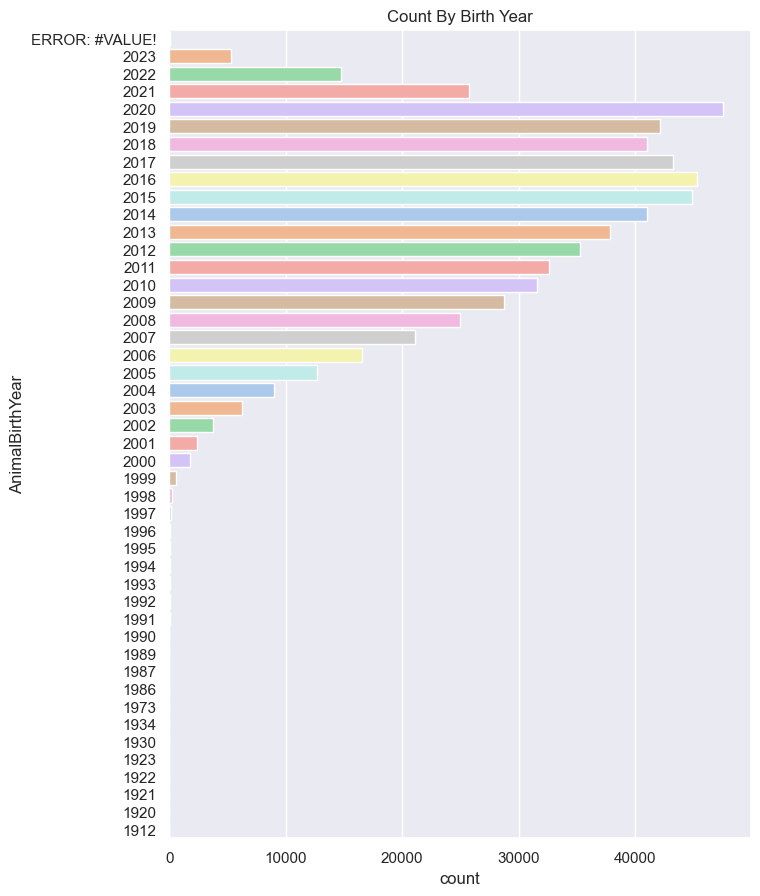

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7.5,10.5)})

sns.barplot(x=birth_years, y=birth_years.index, palette='pastel')

plt.title('Count By Birth Year')

In [8]:
# Dog Breeds
print(f"Total Number of Breeds in Dataset: {licensed_dogs_df['BreedName'].nunique()} \n")
licensed_dogs_df['BreedName'].value_counts().head(50)

Total Number of Breeds in Dataset: 1591 



BreedName
Unknown                                 55254
Yorkshire Terrier                       35363
Shih Tzu                                32432
Chihuahua                               24634
Labrador Retriever                      18902
Maltese                                 18377
Labrador Retriever Crossbreed           16532
American Pit Bull Mix / Pit Bull Mix    15073
Pomeranian                              11953
Shih Tzu Crossbreed                     11784
American Pit Bull Terrier/Pit Bull      11596
Poodle Crossbreed                       10696
Havanese                                10658
Chihuahua Crossbreed                     9633
Golden Retriever                         9253
Beagle                                   8998
French Bulldog                           8833
German Shepherd Dog                      8756
Goldendoodle                             7818
Shiba Inu                                7696
Terrier mix                              7664
Cavalier King Charles Sp

In [20]:
# Create a list of the top 50 dog breed names
t50_breeds = licensed_dogs_df['BreedName'].value_counts().head(51).reset_index()

t50_breeds = t50_breeds['BreedName']

t50_breeds = list(t50_breeds)

t50_breeds = t50_breeds[1:]

print(len(t50_breeds))
t50_breeds

50


['Yorkshire Terrier',
 'Shih Tzu',
 'Chihuahua',
 'Labrador Retriever',
 'Maltese',
 'Labrador Retriever Crossbreed',
 'American Pit Bull Mix / Pit Bull Mix',
 'Pomeranian',
 'Shih Tzu Crossbreed',
 'American Pit Bull Terrier/Pit Bull',
 'Poodle Crossbreed',
 'Havanese',
 'Chihuahua Crossbreed',
 'Golden Retriever',
 'Beagle',
 'French Bulldog',
 'German Shepherd Dog',
 'Goldendoodle',
 'Shiba Inu',
 'Terrier mix',
 'Cavalier King Charles Spaniel',
 'Poodle',
 'Jack Russell Terrier',
 'Poodle, Toy',
 'Siberian Husky',
 'German Shepherd Crossbreed',
 'Yorkshire Terrier Crossbreed',
 'Cocker Spaniel',
 'Not Provided',
 'Maltese Crossbreed',
 'Poodle, Miniature',
 'Australian Shepherd',
 'Pug',
 'Boston Terrier',
 'Labradoodle',
 'Bichon Frise',
 'Beagle Crossbreed',
 'Morkie',
 'Dachshund',
 'Maltipoo',
 'Boxer',
 'Schnauzer, Miniature',
 'American Staffordshire Terrier',
 'Miniature Pinscher',
 'Terrier Crossbreed',
 'Poodle, Standard',
 'Bull Dog, English',
 'Bichon Frise Crossbreed',


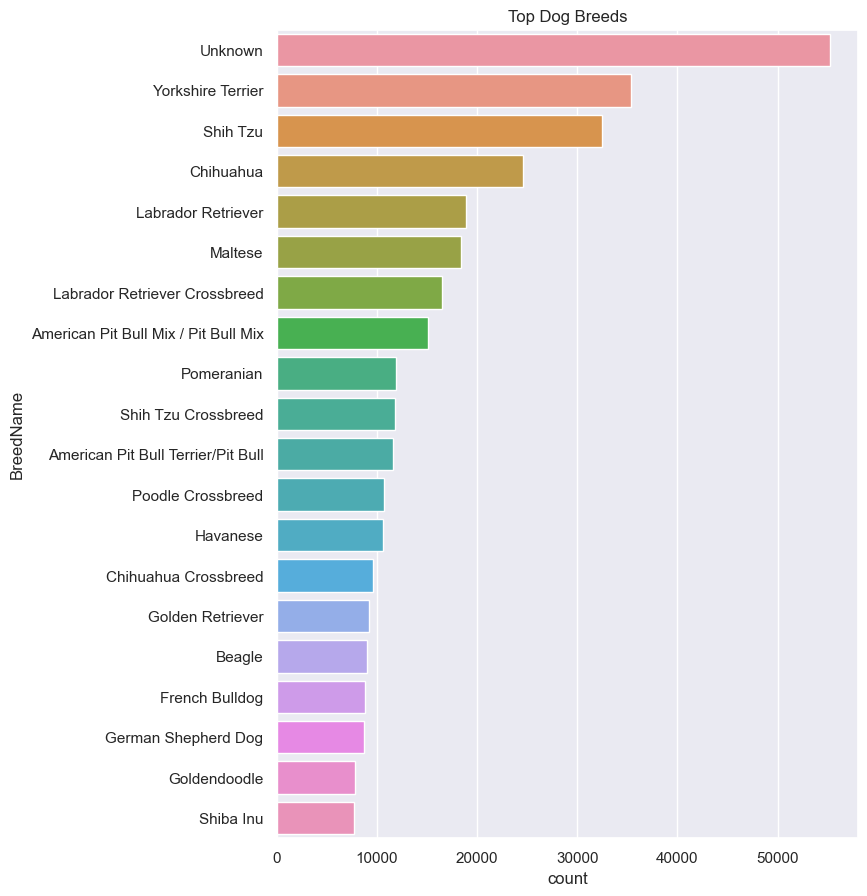

In [10]:
# plot top dog breeds

top_dog_breeds_df = licensed_dogs_df['BreedName'].value_counts().head(20)

sns.barplot(x=top_dog_breeds_df, y=top_dog_breeds_df.index)

plt.title("Top Dog Breeds")

plt.show()

In [23]:
# Drop the rows where dog breed is not in the top 50
t50_licensed_dogs_df = licensed_dogs_df[licensed_dogs_df['BreedName'].isin(t50_breeds)]

display(t50_licensed_dogs_df.head(), t50_licensed_dogs_df.info(), t50_licensed_dogs_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 438376 entries, 0 to 616887
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AnimalName          437224 non-null  object
 1   AnimalGender        438359 non-null  object
 2   AnimalBirthYear     438376 non-null  object
 3   BreedName           438376 non-null  object
 4   ZipCode             438371 non-null  object
 5   LicenseIssuedDate   438376 non-null  object
 6   LicenseExpiredDate  438313 non-null  object
 7   Extract Year        438376 non-null  object
dtypes: object(8)
memory usage: 30.1+ MB


,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465,09/12/2014,10/02/2017,2016
4,LOLA,F,2009,Maltese,10028,09/12/2014,10/09/2017,2016
7,CHEWBACCA,F,2012,Labrador Retriever Crossbreed,10013,09/12/2014,10/01/2019,2016
10,LOLA,F,2006,Miniature Pinscher,10022,09/13/2014,10/03/2019,2016


None

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
count,437224,438359,438376,438376,438371,438376,438313,438376
unique,26141,2,45,50,810,3336,4821,5
top,UNKNOWN,M,2020,Yorkshire Terrier,10025,07/24/2020,07/30/2017,2022
freq,12037,240763,36003,35363,9059,739,711,182349


In [69]:
# Drop rows where the ZipCode and AnimalGender is NA/Null
licensed_t50_dogs_df = t50_licensed_dogs_df.copy()

licensed_t50_dogs_df.dropna(subset=['AnimalGender', 'ZipCode'] , inplace=True)

licensed_t50_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438354 entries, 0 to 616887
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AnimalName          437202 non-null  object
 1   AnimalGender        438354 non-null  object
 2   AnimalBirthYear     438354 non-null  object
 3   BreedName           438354 non-null  object
 4   ZipCode             438354 non-null  object
 5   LicenseIssuedDate   438354 non-null  object
 6   LicenseExpiredDate  438291 non-null  object
 7   Extract Year        438354 non-null  object
dtypes: object(8)
memory usage: 30.1+ MB


In [70]:
# list the columns
licensed_t50_dogs_df.columns

Index(['AnimalName', 'AnimalGender', 'AnimalBirthYear', 'BreedName', 'ZipCode',
       'LicenseIssuedDate', 'LicenseExpiredDate', 'Extract Year'],
      dtype='object')

In [71]:
# Drop Unnessary Columns AnimalName, LicenseIssuedDate, LicenseExpiredDate, Extract Year
licensed_t50_dogs_df = licensed_t50_dogs_df.drop(axis=1, labels=['AnimalName', 'LicenseIssuedDate', 'LicenseExpiredDate', 'Extract Year'])

licensed_t50_dogs_df.columns

Index(['AnimalGender', 'AnimalBirthYear', 'BreedName', 'ZipCode'], dtype='object')

In [72]:
# 4 columns, 438354 rows
licensed_t50_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438354 entries, 0 to 616887
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   AnimalGender     438354 non-null  object
 1   AnimalBirthYear  438354 non-null  object
 2   BreedName        438354 non-null  object
 3   ZipCode          438354 non-null  object
dtypes: object(4)
memory usage: 16.7+ MB


In [73]:
# Some of the zipcodes are not in any of the NYC Boroughs
t50_zipcodes = list(licensed_t50_dogs_df['ZipCode'].unique())

t50_zipcodes[0:20]
# extended list is long, but there are some zipcodes that do not match zipcodes in the Boroughs

['10035',
 '10465',
 '10028',
 '10013',
 '10022',
 '10003',
 '11220',
 '10463',
 '11238',
 '10002',
 '10308',
 '11209',
 '11208',
 '11218',
 '10025',
 '11232',
 '10023',
 '11231',
 '10461',
 '11224']

In [74]:
len(licensed_t50_dogs_df['ZipCode'])

438354

In [75]:
(licensed_t50_dogs_df['ZipCode'][0] < str(10034) and licensed_t50_dogs_df['ZipCode'][0] > str(10034)) or (licensed_t50_dogs_df['ZipCode'][0] < str(10028) and licensed_t50_dogs_df['ZipCode'][0] > str(10000))

False

In [76]:
# Brooklyn:11201-11256
# Manhattan:10001-10282
# Queens:11004-11109, 11351-11697
# Staten Island :10301-10314
# Bronx: 10451-10475


borough_list = []
zip_codes = licensed_t50_dogs_df['ZipCode']

for i in zip_codes.values:
               
    if i > str(11200) and i < str(11257):
        borough_list.append('Brooklyn')
    elif i > str(10000) and i < str(10283):
        borough_list.append('Manhattan')
    elif (i > str(11003) and i < str(11110)) or (i > str(11350) and i < str(11697)):
        borough_list.append('Queens')
    elif i > str(10301) and i < str(10315):
        borough_list.append('Staten Island')
    elif i > str(10450) and i < str(10476):
        borough_list.append('Bronx')
    else:
        borough_list.append('Not_In_A_Borough')

len(borough_list)

438354

In [77]:
# Spot check the zipcodes to be sure they match the borough
licensed_t50_dogs_df['Borough'] = borough_list

licensed_t50_dogs_df.sample(20)

,AnimalGender,AnimalBirthYear,BreedName,ZipCode,Borough
382995,F,2020,Bichon Frise Crossbreed,11228,Brooklyn
74927,F,2016,Maltese Crossbreed,11368,Queens
397001,M,2020,Maltese,11209,Brooklyn
124400,F,2010,Havanese,10021,Manhattan
128074,M,2014,Shih Tzu,10460,Bronx
385465,M,2020,Poodle Crossbreed,11234,Brooklyn
579300,M,2017,German Shepherd Crossbreed,11215,Brooklyn
502504,F,2007,Not Provided,11211,Brooklyn
21065,M,2015,Shih Tzu,11367,Queens
162583,M,2015,American Pit Bull Mix / Pit Bull Mix,11216,Brooklyn


In [78]:
# Many are not in a borough? 4293
licensed_t50_dogs_df['Borough'].value_counts()

Borough
Manhattan           141596
Brooklyn            115510
Queens               92950
Bronx                49156
Staten Island        34849
Not_In_A_Borough      4293
Name: count, dtype: int64

In [79]:
# Drop all Zip Codes outside the NYC Boroughs
licensed_t50_dogs_df = licensed_t50_dogs_df[licensed_t50_dogs_df['Borough'] != 'Not_In_A_Borough']

print(len(licensed_t50_dogs_df['Borough']))
licensed_t50_dogs_df['Borough'].value_counts()

434061


Borough
Manhattan        141596
Brooklyn         115510
Queens            92950
Bronx             49156
Staten Island     34849
Name: count, dtype: int64

In [80]:
# Look at the DataFrame before export
licensed_t50_dogs_df.head()

,AnimalGender,AnimalBirthYear,BreedName,ZipCode,Borough
0,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,Manhattan
1,M,2010,Boxer,10465,Bronx
4,F,2009,Maltese,10028,Manhattan
7,F,2012,Labrador Retriever Crossbreed,10013,Manhattan
10,F,2006,Miniature Pinscher,10022,Manhattan


In [81]:
# export to csv
licensed_t50_dogs_df.to_csv('../cleaned_data/t50_lic_dogs_cleaned')

### Demographics DataFrame 

In [29]:
# read in the csv file
demo_df = pd.read_csv('demographics_by_borough_acs_survey_summary_2016.csv')

demo_df

,Borough,total_pop,median_age,total_housing_units,avg_per_household
0,Bronx,"1,436,785",33.3,"522,401",2.750349
1,Brooklyn,"2,606,852",34.5,"1,021,747",2.551367
2,Manhattan,"1,634,989",36.7,"866,644",1.886575
3,Queens,"2,310,011",37.9,"846,689",2.728287
4,Staten Island,"473,324",39.6,"178,603",2.650146


In [32]:
# Rename columns
demo_df.columns = ['Borough', 'demo_total_pop', 'dem_median_age', 'demo_housing_units',
       'demo_avg_#_per_household']

demo_df.columns

Index(['Borough', 'demo_total_pop', 'dem_median_age', 'demo_housing_units',
       'demo_avg_#_per_household'],
      dtype='object')

In [33]:
# export to csv
demo_df.to_csv('../cleaned_data/demo_summary_cleaned')

### Merge Demographics with Dog Licensing DataFrame

In [82]:
t50_with_demo = licensed_t50_dogs_df.merge(right=demo_df, how='left', on='Borough')

t50_with_demo.head()

,AnimalGender,AnimalBirthYear,BreedName,ZipCode,Borough,demo_total_pop,dem_median_age,demo_housing_units,demo_avg_#_per_household
0,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,Manhattan,"1,634,989",36.7,"866,644",1.886575
1,M,2010,Boxer,10465,Bronx,"1,436,785",33.3,"522,401",2.750349
2,F,2009,Maltese,10028,Manhattan,"1,634,989",36.7,"866,644",1.886575
3,F,2012,Labrador Retriever Crossbreed,10013,Manhattan,"1,634,989",36.7,"866,644",1.886575
4,F,2006,Miniature Pinscher,10022,Manhattan,"1,634,989",36.7,"866,644",1.886575


In [83]:
# Export to CSV
t50_with_demo.to_csv('../cleaned_data/licenses_demo_merged_clean')